<a href="https://colab.research.google.com/github/fran-dev-front/Advanced-Machine-Learning-Methods-team-38/blob/master/TC5033_Activity1b_ID_38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

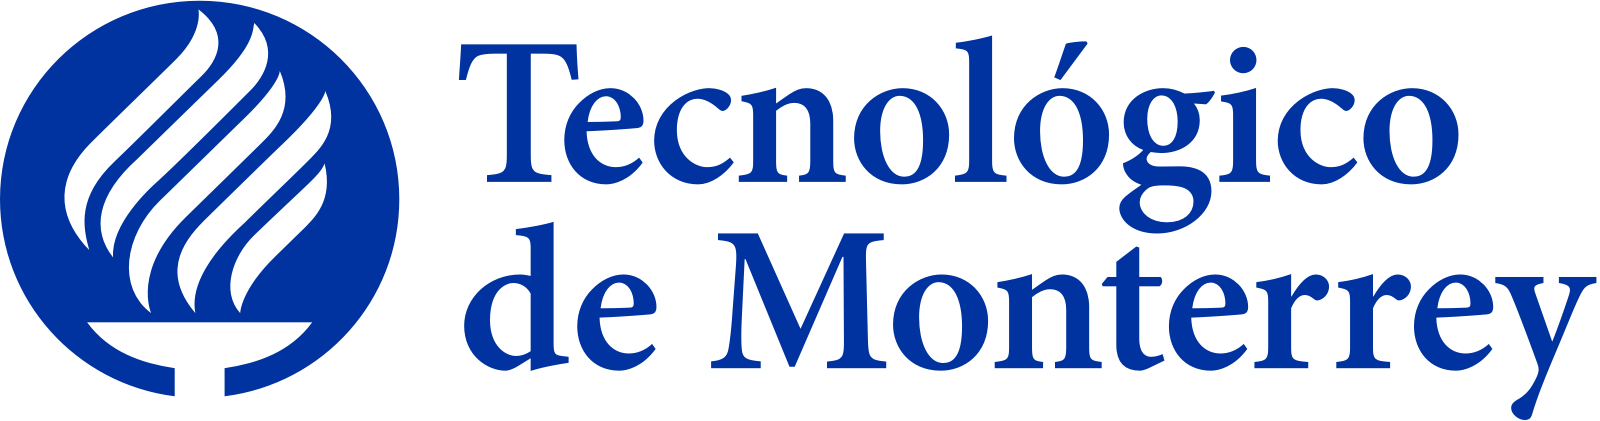

# **Master in Artificial Intelligence**

### Course: **Advanced Machine Learning Methods**

### Tecnológico de Monterrey

### Lead Professor José Antonio Cantoral Ceballos



## Team 38
*   A01794957 Tania Alicia Caballero Saavedra
*   A01283104 Kevin Dueñas Aguirre
*   A01794882 Francisco Marmolejo Martinez
*   A01795106 Francisco Javier Rupit Olvera
*   A01795093 Miguel Angel Alpizar Flores



# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [ ]:
#Import libraries
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

#To reload modules before executing any code
%load_ext autoreload
%autoreload 2
#################################
#To dislay Matplotlib directly in the notebooks cells
%matplotlib inline


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the dataset
import os
#DATA_PATH = "/content/drive/MyDrive/a.- AI/courses/ITESM DL/Labs/Mod1/Collaborative/dataset"
DATA_PATH = "/content/drive/MyDrive"

os.chdir(DATA_PATH)

In [ ]:
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Import Images

In [ ]:
y_train = np.array(train_df['label'])
y_train = y_train.reshape(-1, 1)
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [ ]:
#Here we define a function to split the data set into value and test
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
      Create a function that will allow you to split the previously loaded validation set
      into valition and test.
    '''
    x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=pct, shuffle=shuffle)
    y_test = y_test.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    return x_val, y_val, x_test, y_test

In [ ]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [ ]:
alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


In [ ]:
#For validation purpose
#train_df.shape #(27455, 784)
#x_train.shape #(27455, 784)
#min(y_train) #24
#len(alphabet) #24
#y_train.shape #(27455,)
#y_test.shape #(7172,)
#y_val.shape #(7174,)

### Normalize

In [ ]:
def normalize(x_mean, x_std, x_data):
    '''
       Function that normalizes the data.
    '''
    return (x_data - x_mean) / x_std

In [ ]:
# We  get the mean and the standard deviation, then we normalize the variables
x_mean = x_train.mean()
x_std = x_train.std()
x_train = normalize(x_mean, x_std, x_train)
x_val = normalize(x_mean, x_std, x_val)
x_test = normalize(x_mean, x_std, x_test)

### Plot samples

In [ ]:
# Here a Function that plots the images gets defined
def plot_alphabet(image):
    '''
       Function that plots the images.
    '''
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

The American Sign Picture: p


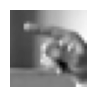

In [ ]:
rnd_idx = np.random.randint(len(y_test))
print(f'The American Sign Picture: {alphabet[y_test[rnd_idx,0]]}')
plot_alphabet(x_test[rnd_idx].reshape(28,28))

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
       Function that creates minibatches.
    '''
    #It is used to show an error if condition is false,
    assert x.shape[0] == y.shape[0], 'Error in len of X and Y arrays'
    total_data = x.shape[0]
    #It is used to rearrange the elements if it is true
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Nuestra clase Linear, ReLU y Sequential

In [ ]:
class np_tensor(np.ndarray): pass
  #Define class np_tensor inherits from np.ndarray with not additional functionality

In [ ]:
#To create an array ([0, 0])
a = np.array([0, 0])

#To create a view of array a with possibility of change in structure or data type
b = a.view(np_tensor)

In [ ]:
#To determine the type of an object
type(a)

numpy.ndarray

In [ ]:
#To determine the type of an object
type(b)

__main__.np_tensor

In [ ]:
a == b

np_tensor([ True,  True])

In [ ]:
#To evaluate if a in pointing to the same space of memory of b
a is b

False

###  Class Linear

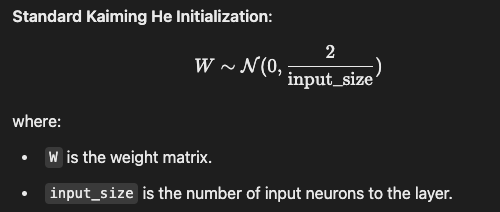

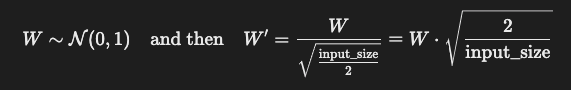

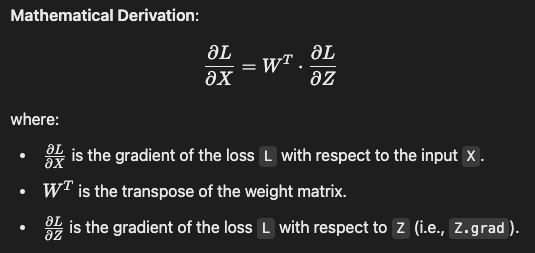

In [ ]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
          Init parameters using Kaiming He
          Method to initializes Weights(W) and Biases (b)
        '''
        #Create a matrix with aleatory values  with size (entradas, neuronas)
        # It is then divided by np.sqrt(input_size/2) [Kaiming He initialization method] to adjust the weights
        # ReLU activation function: The ReLU activation "turns off" approximately half of the inputs,
        # which reduces the effective variance of the activations
        # To compensate for this, the scaling factor is adjusted by dividing by sqrt(input_size/2)
        # Kaiming He initialization ensures that the magnitude of gradients does not diminish too much as
        # they backpropagate through the layers, preventing the vanishing gradient problem

        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        #Create a matrix using neurons sizefilled with zeros and create an instance of np_tensor
        self.b = (np.zeros((output_size, 1))).view(np_tensor)

    def __call__(self, X):
        '''
          Forward pass of lineal class
          Linear transformation method
          Method used when it is not specified other
        '''
        #Linear output
        #Regresa el cálculo de Z multipicando la matriz de valores X por los pesos W y se le suma la matriz de los bias
        Z = self.W @ X + self.b
        return Z


    def backward(self, X, Z):
        '''
          Backward pass of lineal class
          Method for calculating the gradients of the loss function
          with respect to the parameters of the linear transformation.
        '''
        #Calculate the gradients of the loss function with respect to the parameters of the linear transformation
        #self.W.T is the transpose of the Weght matrix
        #Z.grad is the gradient of the loss functions
        X.grad = self.W.T @ Z.grad

        #The gradient of the loss function with respect to the parameters of the linear transformation
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU

In [ ]:
class ReLU():
    '''
       Rectified Linear Unit (ReLU) activation function
       Method for calculating the gradients of the loss function
       with respect to the parameters of the linear transformation.
    '''
    def __call__(self, Z):
        #Implements the forward pass of the ReLU activation
        #Input Z = W @ X + b
        #It returns the value of Z if Z is greater than 0, otherwise it returns 0.
        return np.maximum(0, Z)

    def backward(self, Z, A):
        #Implements the backward pass of the ReLU activation
        #It calculates the gradient of the loss function with respect to the input of the ReLU activation
        #Copies the gradient of the loss function with respect to A.grad into Z.grad
        Z.grad = A.grad.copy()
        #Sets the gradient Z.grad to zero for all elements of Z that are less than or equal to zero
        Z.grad[Z <= 0] = 0

### Clase Sequential

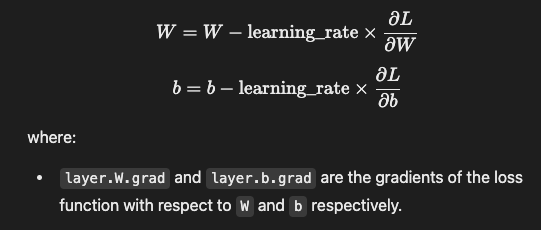

In [ ]:
class Sequential_layers():
    '''
      Sequetial layers class designed to handle a sequence of neural network layers,
      and activation function ReLU
    '''
    def __init__(self, layers):
        '''
          Initializes the object
          layers - list of objets Linear, ReLU
        '''
        # A list containing objects of type Linear, ReLU
        # layers = [Linear(784, nn), ReLU(), Linear(nn, nn), ReLU(), Linear(nn, 24)]
        self.layers = layers
        # A temporary variable that holds the output of each layer
        self.x = None
        # Create a dictionary to store the outputs of each layer
        self.outputs = {}

    def __call__(self, X):
        '''
          Forward pass of sequential class
          Method used when it is not specified other
        '''
        # Assign the input to the temporary variable
        self.x = X
        # Store the initial values of layer 0 in the outputs dictionary
        self.outputs['l0'] = self.x

        # Iterate throught each layer
        for i, layer in enumerate(self.layers, 1):
            # Compute the output of the current layer using its __call__ method and assign it to the temporary variable to be used as the input for the next layer
            self.x = layer(self.x)
            # Store the output of the current layer in the outputs dictionary with a key corresponding to the layer ('l' + str(i)). i starts from 1
            self.outputs['l'+str(i)]=self.x
        # Return the final output of the model (sequence of layers)
        return self.x

    def backward(self):
        '''
          Backward pass of sequential class
          Method for calculating the gradients of the loss function
          with respect to the parameters of the linear transformation.
          needed for updating weights and biases
        '''
        #Iterate throught each layer in reverse order (de la última capa a la primera) usando reversed(range(...))
        for i in reversed(range(len(self.layers))):
            # For each layer, call its backward() method, passing the output of the previous layer (self.outputs['l' + str(i)])
            # and the output of the current layer (self.outputs['l' + str(i + 1)]) stored in self.outputs
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])

            #Example:
            #Imagine you have 2 layers in the network: Linear (0) -> ReLU (1). During the forward pass,
            #the intermediate outputs of the layers are stored in self.outputs like this:

            #self.outputs['l0']: Initial input to the network (first layer).
            #self.outputs['l1']: Output of the first layer (the Linear layer).
            #self.outputs['l2']: Output of the second layer (the ReLU layer), which is the final output.

            #During the backward pass, the loop goes backward from the last layer:
            #For layer 1 (ReLU layer)
            #Output of the previous layer: self.outputs['l1'] (output of the first Linear layer)
            #Output of the current layer: self.outputs['l2'] (output of the ReLU layer)
            #For layer 0 (first Linear layer):
            #Output of the previous layer: self.outputs['l0'] (the original input to the network)
            #Output of the current layer: self.outputs['l1'] (output of the first Linear layer)

    def update(self, learning_rate = 1e-3):
        '''
          Updates the weights and biases of the layers using gradient descent
          for each layer in the layers list
        '''
        # Iterate through each layer in the network. If the layer is of type ReLU, skip it
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            # Update W = W − learning_rate × ∇W
            layer.W = layer.W - learning_rate * layer.W.grad
            # Update b = b − learning_rate × ∇b
            layer.b = layer.b - learning_rate * layer.b.grad

    def predict(self, X):
        '''
          Makes a prediction by performing a forward pass through the network and
          returning the index of the maximum value (the predicted class)
        '''
        # The __call__(X) method performs a full forward pass through the network
        # np.argmax() is applied to get the index of the neuron with the highest value
        return np.argmax(self.__call__(X))

### Cost Function

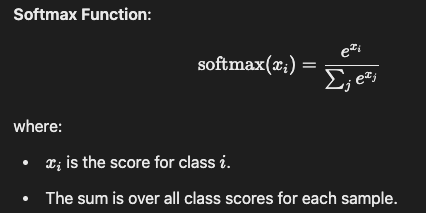

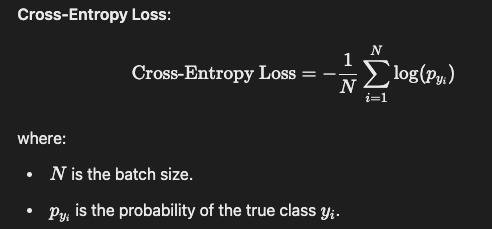


In [ ]:
def softmaxXEntropy(x, y):
    '''
      Function to calculate softmaxx, it combine the softmax activation function
      with the cross-entropy loss function
    '''
    #Number of samples in the batch
    batch_size = x.shape[1]
    #This computes the element-wise exponential of x (e xi)
    exp_scores = np.exp(x)
    #This line COMPUTES THE SOFTMAX of the scores
    #Each exponential value is divided by the sum of all exponential values in the same column,
    #normalizing the values to obtain probabilities
    probs = exp_scores / exp_scores.sum(axis = 0)
    #Create a copy of the array probs
    preds = probs.copy()
    #Extracts the probabilities of the true class labels for each sample in the batch
    #y.squeeze() ensures that y is a flat array with shape (batch_size,)
    #np.arange(batch_size) generates an array [0, 1, 2, ...,
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    #Cost
    #Computes the average cross-entropy loss over the batch
    cost = np.sum(-np.log(y_hat)) / batch_size
    # for calculating the gradients
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

### Loop de entrenamiento

In [ ]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    '''
      Function to train the model
      For mb_size and learning_rate uses default values
    '''
    #Loop iterates through each epoch
    for epoch in range(epochs):
        #Loop iterates through each mini-batch
        #enumerate function to catch (x,y) arrays
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            #Transpose operation required for calculation the number of features
            #view(np_tensor) converts into an instance of np_tensor
            #model() performs a forward pass
            #The input matrix is passed through the 5 layers of the model to generate the scores
            #Z2 is calculated, determining which neurons of the layers will be activated with that pixel
            #The forward pass is computed for both Linear and ReLU layers
            scores = model(x.T.view(np_tensor))

            #Applies softmax activation to obtain class probabilities
            #L funcion de perdida
            #The larger the loss function, the less efficient the model is at recognizing images
            #That's why we use the cost function
            _, cost = softmaxXEntropy(scores, y)

            #Performs the backward pass through the model, calculating the gradients of the loss
            model.backward()

            #Updates the model parameters based on the gradients and the learning rate
            model.update(learning_rate)
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')

In [ ]:
def accuracy(x, y, mb_size):
    '''
      Function to calculate the accuracy of the model
    '''
    correct = 0
    total = 0
    #Loop iterates through each mini-batch
    #enumerate function to catch (x,y) arrays
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        #Performs a forward pass through the model using the transposed mini-batch
        pred = model(x.T.view(np_tensor))
        #Compares the predicted class labels to the true class labels
        #and adds the number of correctly predicted samples in the current mini-batch
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

### Create your model and train it

In [ ]:
#accuracy 80%
nn=200
         # Linear1: Matrix Z = (W0)X + b0 | ReLU1: returns Z if Z > 0, else 0
         # Linear2: Matrix Z1 = (W1)Z + b1 | ReLU2: returns Z1 if Z1 > 0, else 0
         # Linear3: Matrix Z2 = (W2)Z1 + b2
         # Returns the initialized network structure
         # model = Z2 Matrix
model = Sequential_layers([Linear(784, nn), ReLU(), Linear(nn, nn), ReLU(), Linear(nn, 24)])
mb_size = 512
learning_rate =8e-4
epochs = 20

In [ ]:
train(model, epochs, mb_size, learning_rate)

costo: 0.17081932875908745, accuracy: 0.7356385945343
costo: 0.028268630192910895, accuracy: 0.7618516452872282
costo: 0.013476016030888474, accuracy: 0.7744004461795873
costo: 0.009453082742587297, accuracy: 0.7752370329057445
costo: 0.006435457353232842, accuracy: 0.7760736196319018
costo: 0.004615656887178947, accuracy: 0.7783045175683212
costo: 0.004612780944536091, accuracy: 0.7732849972113776
costo: 0.003631743627714941, accuracy: 0.7752370329057445
costo: 0.0028028113417735015, accuracy: 0.775515895147797
costo: 0.0022799798353736445, accuracy: 0.7752370329057445
costo: 0.0020490975789970653, accuracy: 0.7760736196319018
costo: 0.0016192741823814261, accuracy: 0.7777467930842163
costo: 0.002085438815924694, accuracy: 0.7780256553262688
costo: 0.0016018122549902815, accuracy: 0.7802565532626883
costo: 0.0014380091376237638, accuracy: 0.7822085889570553
costo: 0.00136509868281919, accuracy: 0.7799776910206359
costo: 0.0013738357652971643, accuracy: 0.7847183491355271
costo: 0.0014

### Test your model on Random data from your test set

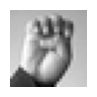

The ASL predicted is: a real ASL is:e


In [ ]:
# Select a random index from the test data,
# plot the corresponding image, predict the ASL letter,
# and compare with the actual label
idx = np.random.randint(len(y_test))
plot_alphabet(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'The ASL predicted is: {alphabet[pred]} real ASL is:{alphabet[y_test[idx,0]]}')